# Kuramoto - Sivashinsky equation

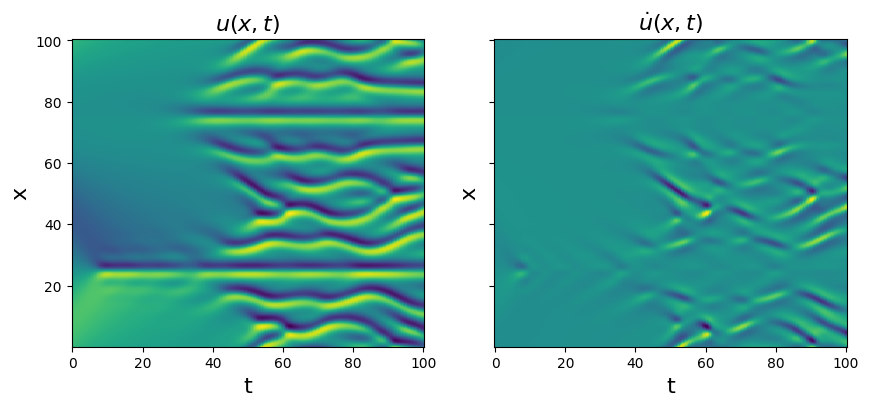

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pysindy as ps
from scipy.io import loadmat

# Load and plot the data
data = loadmat("../../data/kuramoto_sivishinky.mat")
time = np.ravel(data["tt"])
x = np.ravel(data["x"])
u = data["uu"]
dt = time[1] - time[0]
dx = x[1] - x[0]

# Plot u and u_dot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pcolormesh(time, x, u)
plt.xlabel("t", fontsize=16)
plt.ylabel("x", fontsize=16)
plt.title(r"$u(x, t)$", fontsize=16)

u_dot = ps.FiniteDifference(axis=1)._differentiate(u, t=dt)
plt.subplot(1, 2, 2)
plt.pcolormesh(time, x, u_dot)
plt.xlabel("t", fontsize=16)
plt.ylabel("x", fontsize=16)
ax = plt.gca()
ax.set_yticklabels([])
plt.title(r"$\dot{u}(x, t)$", fontsize=16)
plt.show()

So at this point the first component of `u` is `x` and the second is `t`

In [10]:
print(f"{u.shape = }, {x.shape = }, {time.shape = }")

u.shape = (1024, 251), x.shape = (1024,), time.shape = (251,)


So next we prepare the space-time coordinates `XT` which have the same shape as `u` plus an extra dimension for the space-time label, first `x` then `t`

In [13]:
u = u.reshape(len(x), len(time), 1)
X, T = np.meshgrid(x, time)
XT = np.asarray([X, T]).T

print(f"{u.shape = }, {X.shape = }, {T.shape = }, {XT.shape = }")

u.shape = (1024, 251, 1), X.shape = (251, 1024), T.shape = (251, 1024), XT.shape = (1024, 251, 2)


Notice how the dimension of `u` is first `x` then `t` and this is the same for `XT`. To be extra sure that we are dealing with identities:

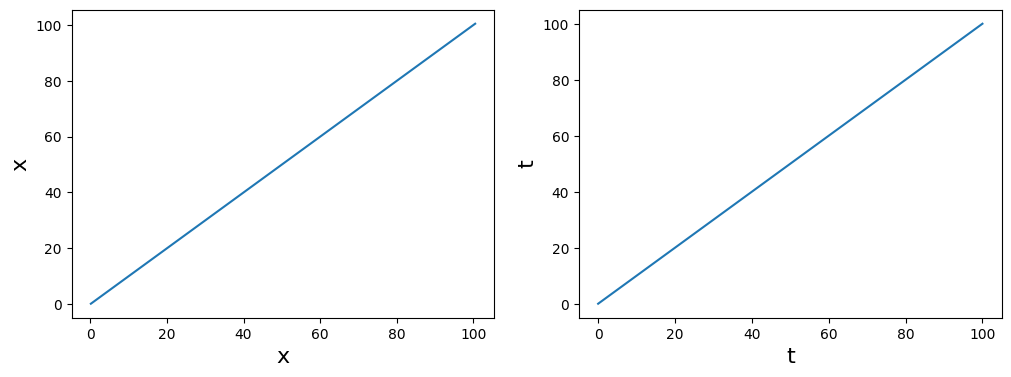

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, XT[:, 0, 0])
plt.xlabel("x", fontsize=16)
plt.ylabel("x", fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(time, XT[0, :, 1])
plt.xlabel("t", fontsize=16)
plt.ylabel("t", fontsize=16)

plt.show()

Now we are ready to define the PDE library

In [18]:
library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]
pde_lib = ps.WeakPDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=4,
    spatiotemporal_grid=XT,
    is_uniform=True,
    K=200,
    include_interaction=True,
    periodic=True,
)

and now we can run the algorithm and sweep `threshold`

In [33]:
%%time
# Run optimizers
for threshold in [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 2, 5, 10, 20, 50]:
    optimizer = ps.STLSQ(threshold=threshold, alpha=0.05, normalize_columns=True)
    model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
    model.fit(u)
    model.print()

(x0)' = -1.000 x0_11 + -1.000 x0_1111 + -1.000 x0x0_1 + 0.002 x0x0_111
(x0)' = -1.000 x0_11 + -1.000 x0_1111 + -1.000 x0x0_1 + 0.002 x0x0_111
(x0)' = -1.000 x0_11 + -1.000 x0_1111 + -1.000 x0x0_1 + 0.002 x0x0_111
(x0)' = -1.000 x0_11 + -1.000 x0_1111 + -1.000 x0x0_1 + 0.002 x0x0_111
(x0)' = -1.000 x0_11 + -1.000 x0_1111 + -1.000 x0x0_1 + 0.002 x0x0_111
(x0)' = -1.000 x0_11 + -1.000 x0_1111 + -1.000 x0x0_1 + 0.002 x0x0_111
(x0)' = -0.999 x0_11 + -0.999 x0_1111 + -1.002 x0x0_1
(x0)' = -0.999 x0_11 + -0.999 x0_1111 + -1.002 x0x0_1
(x0)' = -0.999 x0_11 + -1.000 x0_1111 + -1.002 x0x0_1
(x0)' = -0.998 x0_11 + -0.999 x0_1111 + -1.002 x0x0_1
(x0)' = -0.998 x0_11 + -0.999 x0_1111 + -1.002 x0x0_1
(x0)' = 0.000
(x0)' = 0.000
CPU times: user 1.98 s, sys: 180 ms, total: 2.16 s
Wall time: 2.17 s
